<a href="https://colab.research.google.com/github/Nciso/colabs/blob/main/ENRIQUE_ENCISO_FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [7]:
# using colab, so loading data from my google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT_DATASCIENCE/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [12]:
# We can use .info() to see all columns, its datatypes and nonnull count, as well as the total of entries (rows) of the dataset
df.info()

# Alternatively, we could check the number of rows and columns by using the data frame's shape

columns = df.shape[0]
rows = df.shape[1]
print()
print("number of columns: ", columns)
print("number of rows:", rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB

number of columns:  1898
number of rows: 9


#### Observations:


We can see by simple inspection that this dataset contains 1898 rows, and in all nine columns stated in the data dictionary, we have 1898 no-null counts, meaning that no data is missing in each row. Alternatively we could use `.shape` to get the number of columns and rows

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [13]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


we can conclude from the columns the following

- **order_id**: unique id for orders, it is an integer
- **customer_id**: unique id for customers, it is an integer
- **restaurant_name**: it is the name of the restaurant from what the order was given
- **cousie_type**: it is a categorical variable, the type of food ordered
- **cost_of_the_order**: a numerical value that represents the cost of the order
- **day_of_week**: categorical value, two possible values, was the order made in a weekday or in a weekend
- **rating**: a numerical representation of the customer's satisfaction with the food. It can be from 1 to 5, with one meaning least liked and five meaning super liked. If the costumer gave no rating, the value is "Not given."
- **food_prepation_time**: time spend preparing the food by the restaurant, from receiving the order to delivering to the courier, the value is in minutes
- **delivery_time**: time spend deliverying to food from the restaurant to the customer by the courier, the value is in minutes

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [15]:
# with the .info() above we can see that there is no missing data, we can corroborate that with this

missing_data = df.isnull().sum()
missing_data

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


There is no missing data in any of the columns

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [20]:
# we could use the describe() method to get all from once
describe = df["food_preparation_time"].describe()
# or go one by one, minimum time
min = df["food_preparation_time"].min()
# average
average = df["food_preparation_time"].mean()
# maximun
max = df["food_preparation_time"].max()

print(describe)

print("minimun preparation time: ", min)
print("average preparation time: ", average)
print("maximun preparation time: ", max)



count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64
minimun preparation time:  20
average preparation time:  27.371970495258168
maximun preparation time:  35


#### Observations:


As we can see, a restaurant takes in average about 27 minutes to prepare a dish
The minimum preparation time reported is 20 min and the maximun is 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [24]:
# We count the 'Not given	' orders
not_rated_orders = (df['rating'] == 'Not given').sum()
print("Total of 'Not given' orders:", not_rated_orders)

percentage_not_rated = (not_rated_orders / len(df["rating"])) * 100
print(f"{percentage_not_rated:.2f}% of orders are not rated")

Total of 'Not given' orders: 736
38.78% of orders are not rated


#### Observations:


38.78% of orders are not rated, in total 736/1898 have no rating

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

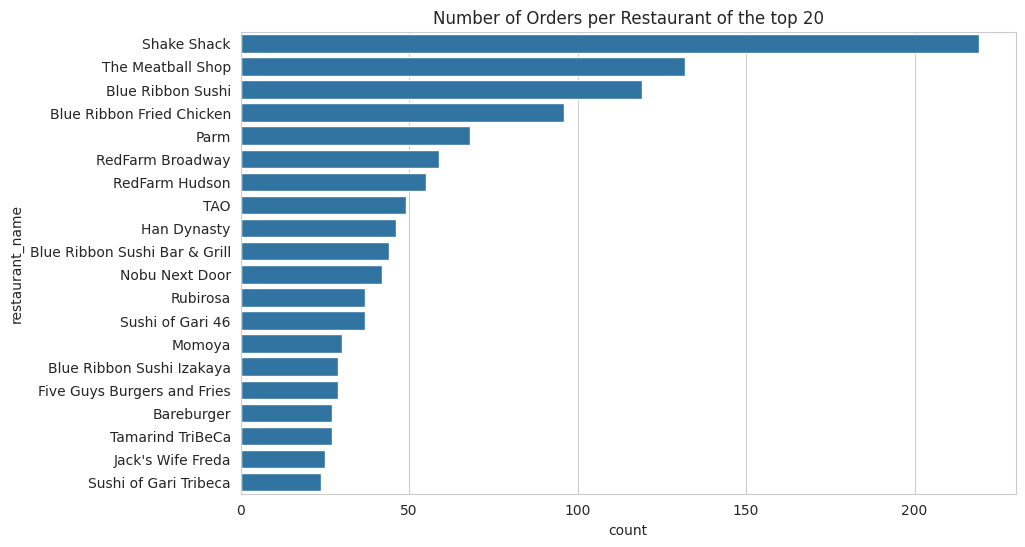

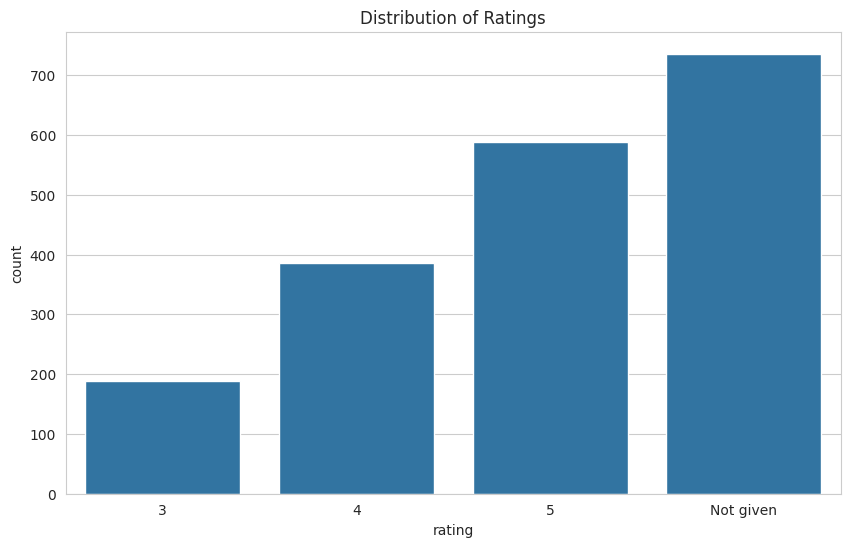

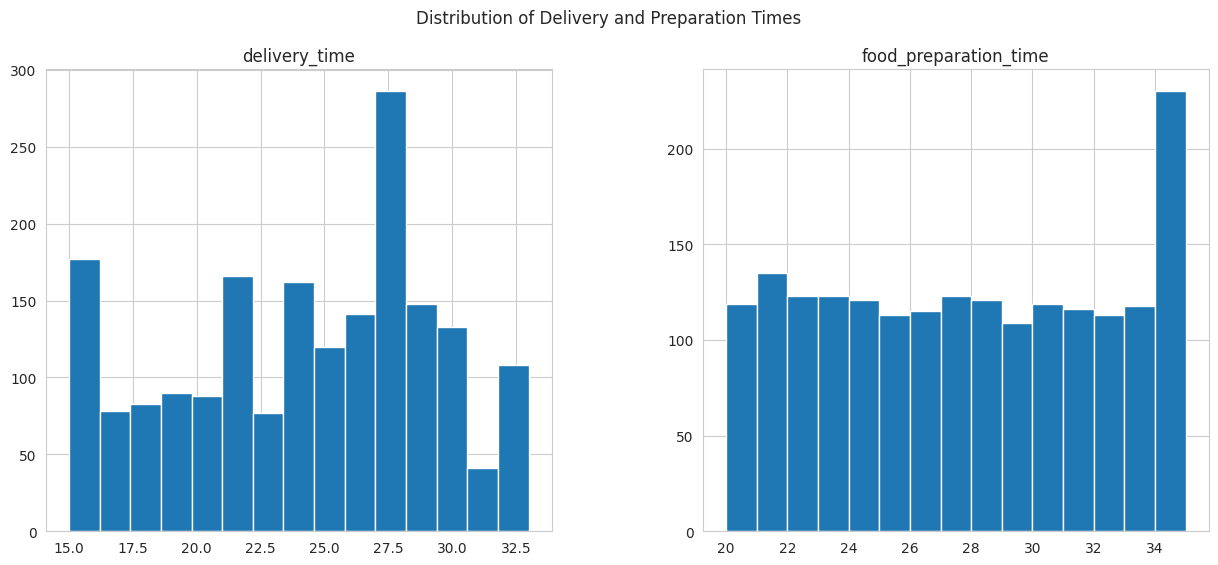

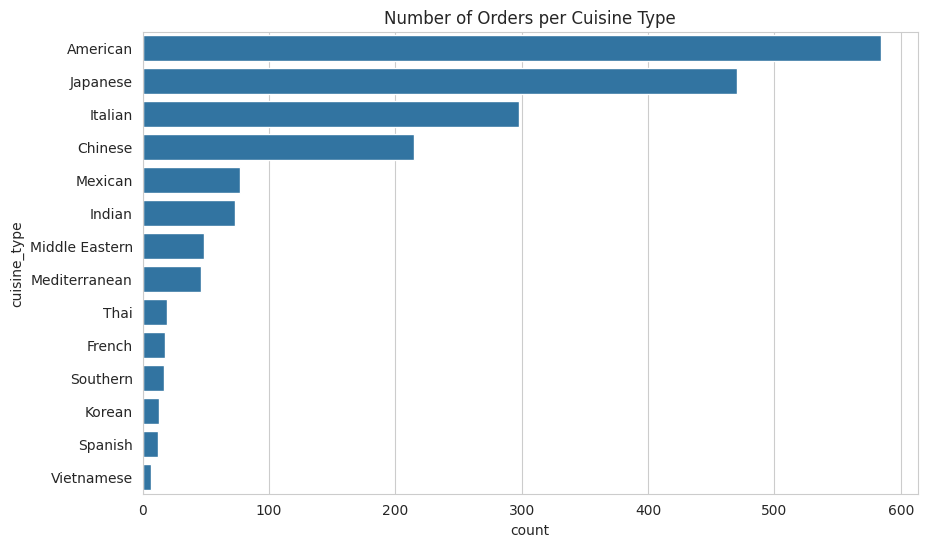

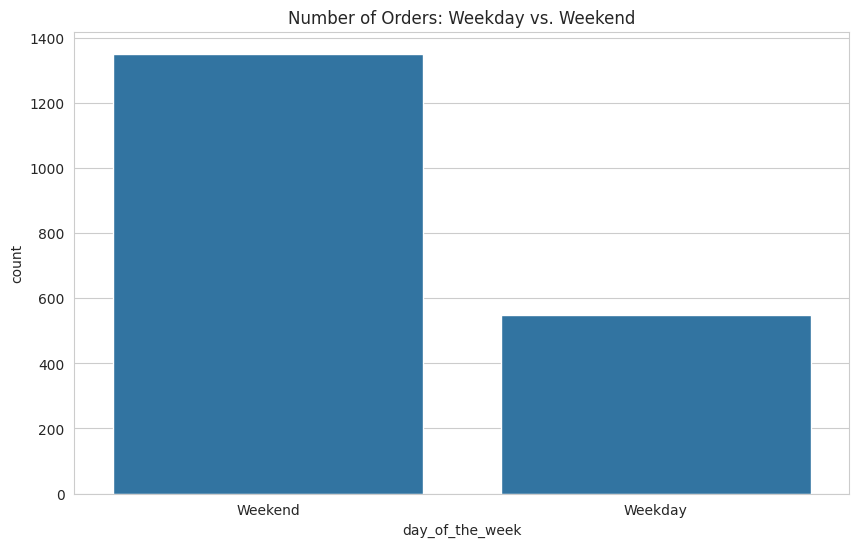

In [43]:
# There is no reason to plot order_id because they are identifiers, (at least for univariable analysis)

# Plot for Restaurant Name
# there are too many restaurants, we are going to plot the top 20 and the bottom 10
# Get the top 20 restaurants by order count
top_restaurants = df['restaurant_name'].value_counts().head(20).index
# Filter the DataFrame to include only the top 20 restaurants
top_restaurants_df = df[df['restaurant_name'].isin(top_restaurants)]
plt.figure(figsize=(10,6))
#sns.countplot(data=df, y='restaurant_name', order=df['restaurant_name'].value_counts().index) # too much noise to see all of them
sns.countplot(data=top_restaurants_df, y='restaurant_name', order=top_restaurants_df['restaurant_name'].value_counts().index)
plt.title('Number of Orders per Restaurant of the top 20')
plt.show()


# Plot for Ratings
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', order=sorted(df['rating'].unique()))
plt.title('Distribution of Ratings')
plt.show()

# Histograms for Food Delivery Time and Preparation Time
df[['delivery_time', 'food_preparation_time']].hist(bins=15, figsize=(15, 6), layout=(1, 2))
plt.suptitle('Distribution of Delivery and Preparation Times')
plt.show()

# Plot for Cuisine Type
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title('Number of Orders per Cuisine Type')
plt.show()

# Plot for Weekday/Weekend
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='day_of_the_week')
plt.title('Number of Orders: Weekday vs. Weekend')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

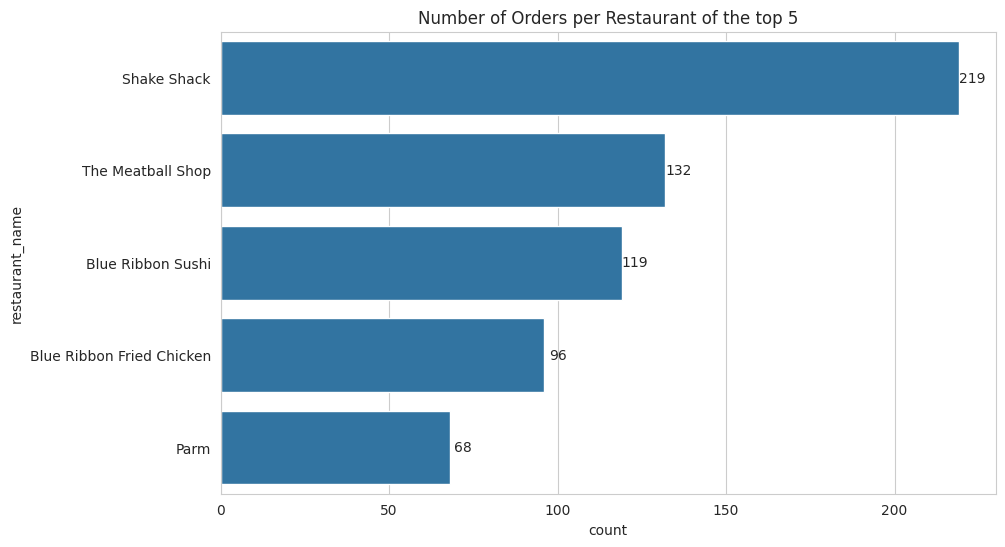

difference between the top 1 and top 5 restaurant in terms of orders: 151


In [47]:
top_restaurants = df['restaurant_name'].value_counts().head(5).index
# Filter the DataFrame to include only the top 5 restaurants
top_restaurants_df = df[df['restaurant_name'].isin(top_restaurants)]
plt.figure(figsize=(10,6))
ax = sns.countplot(data=top_restaurants_df, y='restaurant_name', order=top_restaurants_df['restaurant_name'].value_counts().index)
plt.title('Number of Orders per Restaurant of the top 5')


# Add labels to each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 4,  # position text slightly right
             p.get_y() + p.get_height() / 2,  # position text at the center of the bar
             '{:1.0f}'.format(width),  # bar label
             ha='center',  # horizontal alignment
             va='center')  # vertical alignment

plt.show()

orders_from_shake_shack = (df['restaurant_name'] == 'Shake Shack').sum()

oders_from_parm = (df['restaurant_name'] == 'Parm').sum()

diff = orders_from_shake_shack-oders_from_parm

print("difference between the top 1 and top 5 restaurant in terms of orders:", diff)


#### Observations:

The top 1 restaurant is ShakeShack, with 219 orders
the top 5 is Parm with 69 orders

the difference between them is of 151 orders


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

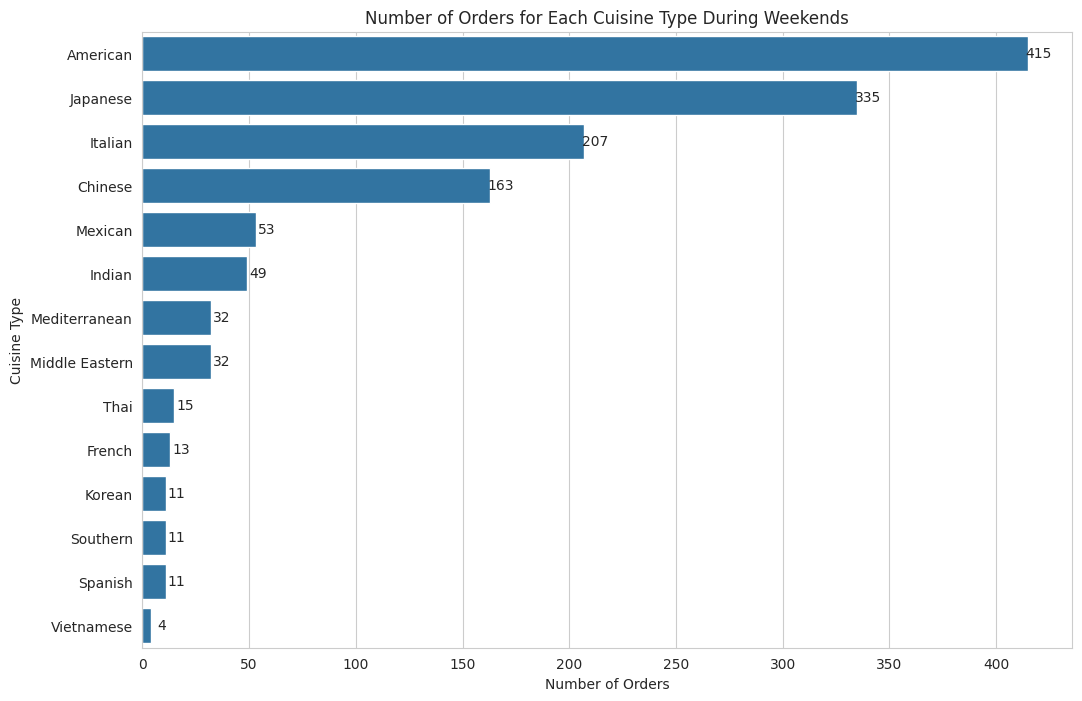

In [50]:
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=weekend_orders, y='cuisine_type', order=weekend_orders['cuisine_type'].value_counts().index)

plt.title('Number of Orders for Each Cuisine Type During Weekends')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')

# Add labels to each bar, at the end of each the bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5,
             p.get_y() + p.get_height() / 2,
             '{:1.0f}'.format(width),
             ha='center',
             va='center')

plt.show()

#### Observations:
The type of cousine most ordered during weekends is the american with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [69]:

orders_above_20 = (df['cost_of_the_order'] > 20).sum()
total_orders = len(df['cost_of_the_order'])
percentage = (orders_above_20/total_orders) *100
percentage
print(f"{percentage:.2f}% of orders cost more than 20 dollars")

29.24% of orders cost more than 20 dollars


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

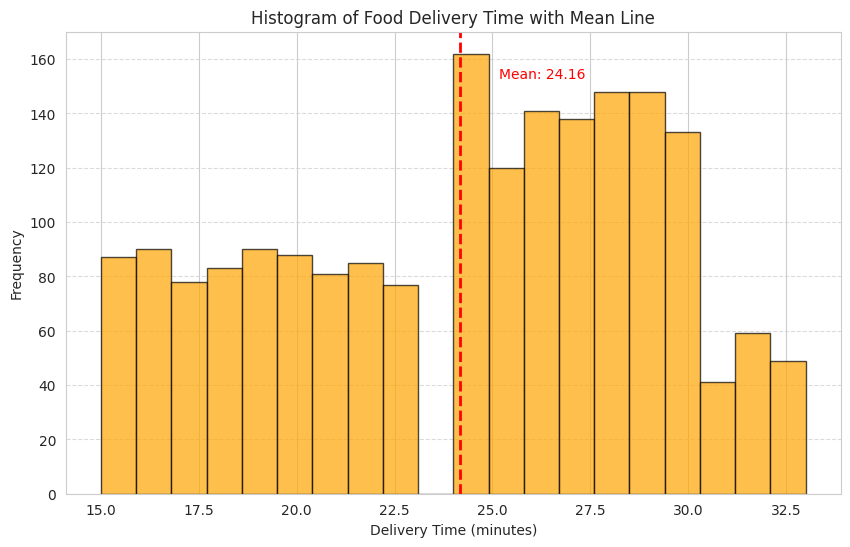

In [79]:


mean_delivery_time = df['delivery_time'].mean()
plt.figure(figsize=(10, 6))
plt.hist(df['delivery_time'], bins=20, color='orange', edgecolor='black', alpha=0.7)

# Plotting the mean line, I want to see the meain inside this histogram
plt.axvline(mean_delivery_time, color='red', linestyle='dashed', linewidth=2)

# The line will be red
plt.text(mean_delivery_time + 1, plt.ylim()[1] * 0.9, f'Mean: {mean_delivery_time:.2f}', color='red')

plt.title('Histogram of Food Delivery Time with Mean Line')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Observations:
Althoug the median for the delivery time is 25, the mean of the delivery time is 24.1617

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

   customer_id  order_count
0        52832           13
1        47440           10
2        83287            9


<ipython-input-152-6e3b7219fbe4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='customer_id', y='order_count', data=top_three, palette='coolwarm', order=top_three['customer_id'])


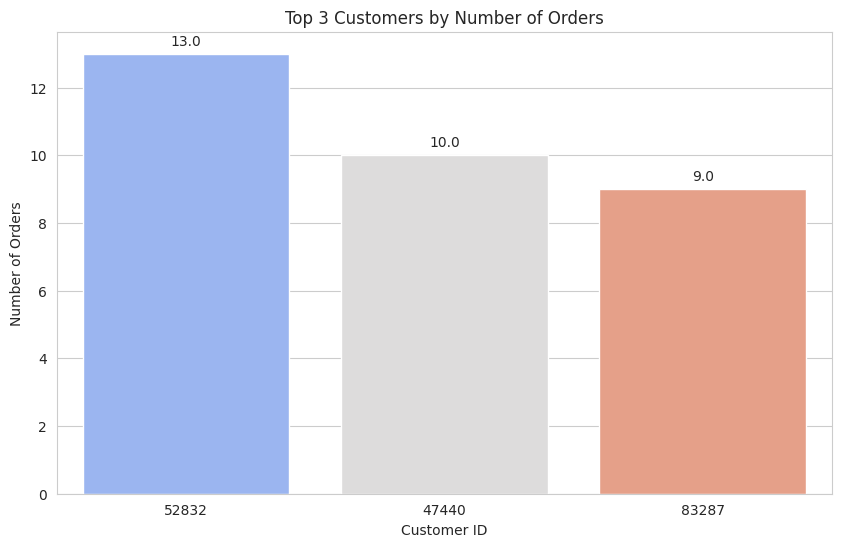

In [152]:

customer_order_counts = df['customer_id'].value_counts()
customer_order_counts_df = customer_order_counts.reset_index()
customer_order_counts_df.columns = ['customer_id', 'order_count']

top_three = customer_order_counts_df.head(3).sort_values('order_count', ascending=False)
print(top_three)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='customer_id', y='order_count', data=top_three, palette='coolwarm', order=top_three['customer_id'])

plt.title('Top 3 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

#### Observations:
The customers with most orders are:

- 52832 with 13 orders
- 47440 with 10 orders
- 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-104-88eed15515ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


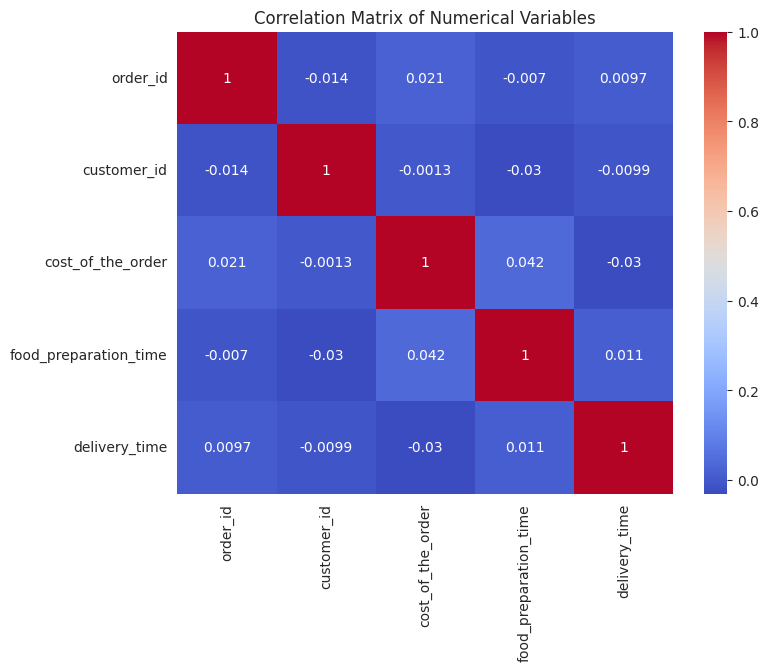

"\nsns.pairplot(df, hue='day_of_the_week')  # you can use the 'hue' parameter for a categorical variable\nplt.show()\n\n#cuisine_type\nsns.pairplot(df, hue='cuisine_type')  # you can use the 'hue' parameter for a categorical variable\nplt.show()\n\n\nplt.figure(figsize=(12, 8))\nax = sns.violinplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='coolwarm', inner='quartile')\nax.set_title('Violin Plot of Cost of the order by cousine type', fontsize=16)\nax.set_xlabel('Cuisine Type', fontsize=14)\nax.set_ylabel('Cost of Order', fontsize=14)\nplt.xticks(rotation=0)  # Set rotation to 0 for horizontal labels\n#sns.despine(trim=True)  # Trim the axes for a cleaner look\nplt.tight_layout()\nplt.show()\n"

In [104]:

corr = df.corr()

# heatmap to see it in colors
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



### Correlation analysis
This shows us the relationship of numerical variables have a low correlation, meaning that they are no related



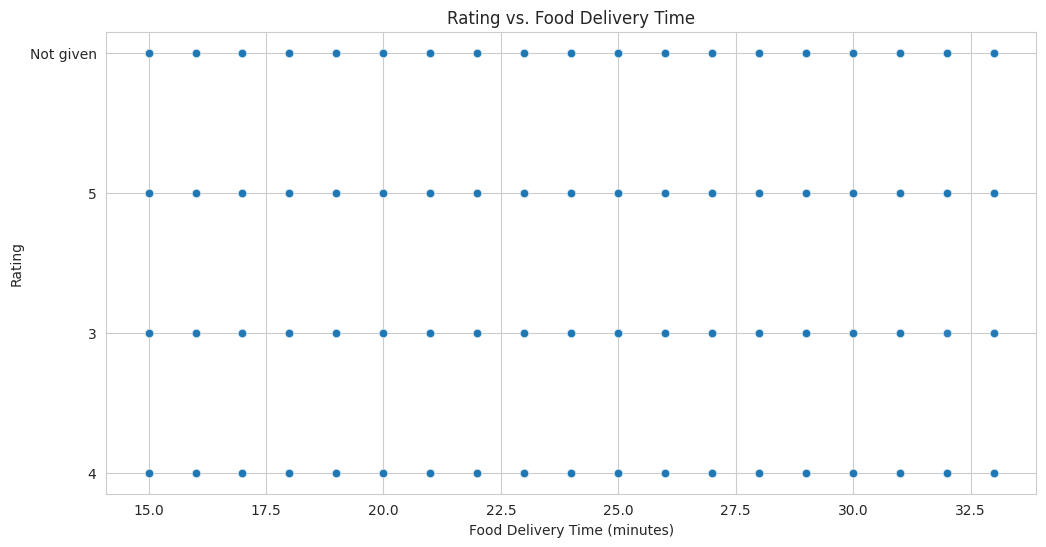

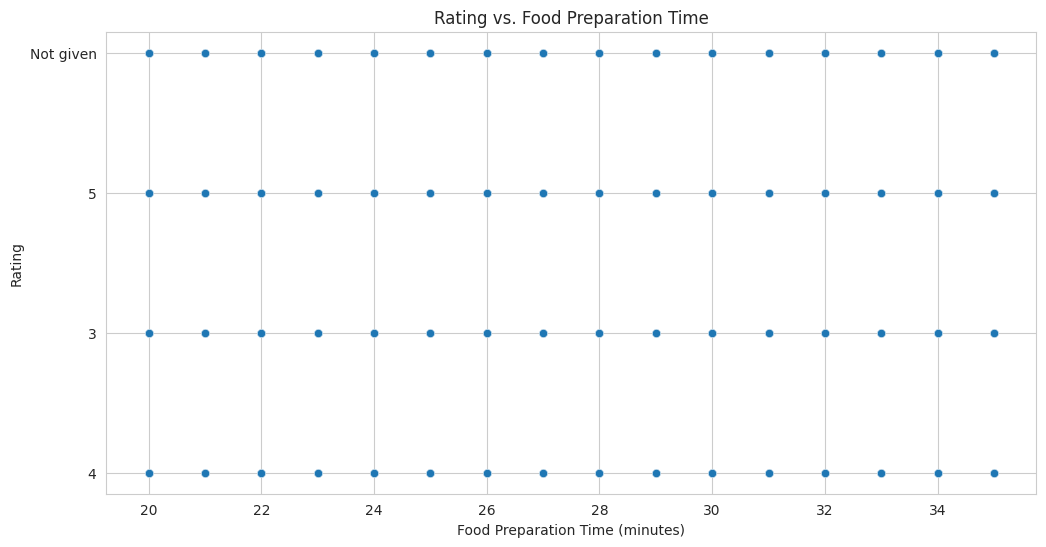

In [105]:


# Plot for Rating vs. Delivery Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='delivery_time', y='rating', data=df, alpha=0.6)
plt.title('Rating vs. Food Delivery Time')
plt.xlabel('Food Delivery Time (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Plot for Rating vs. Preparation Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='food_preparation_time', y='rating', data=df, alpha=0.6)
plt.title('Rating vs. Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

### conclusions

No ratings below 3, could be related to a not bad quality service or the customers have a bias giving low rates to orders

Preparation time and Delivery Time do not seems to affect the rating of the order

Perhaps would be necessary to create two types of rating, one for food preparation time and the other for food delivery.

Important! Food quality is not being evaluated here

<ipython-input-146-8b25c1acfd64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, palette='viridis')


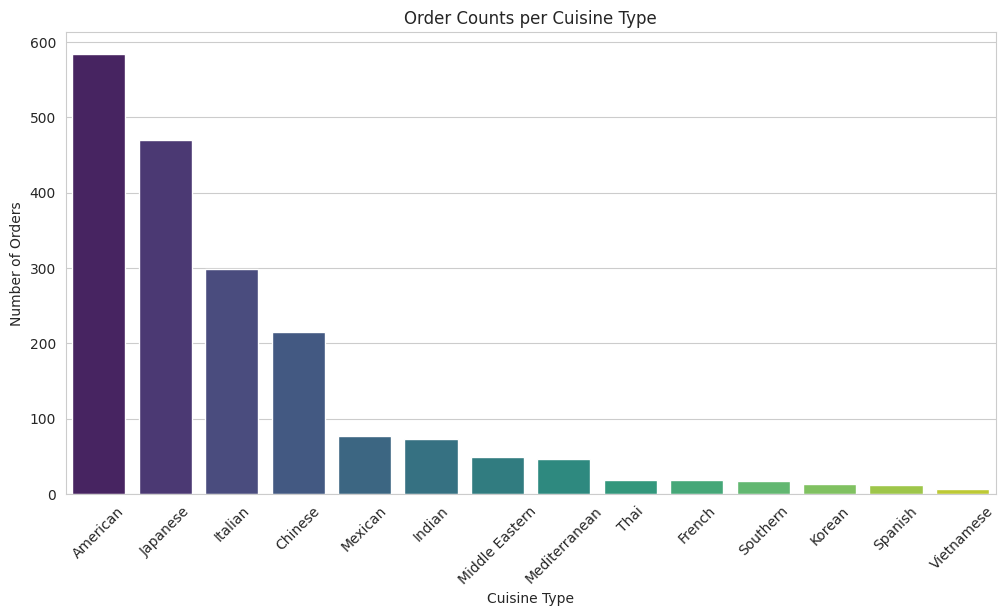

<ipython-input-146-8b25c1acfd64>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cuisine_type', y='delivery_time', palette='viridis')


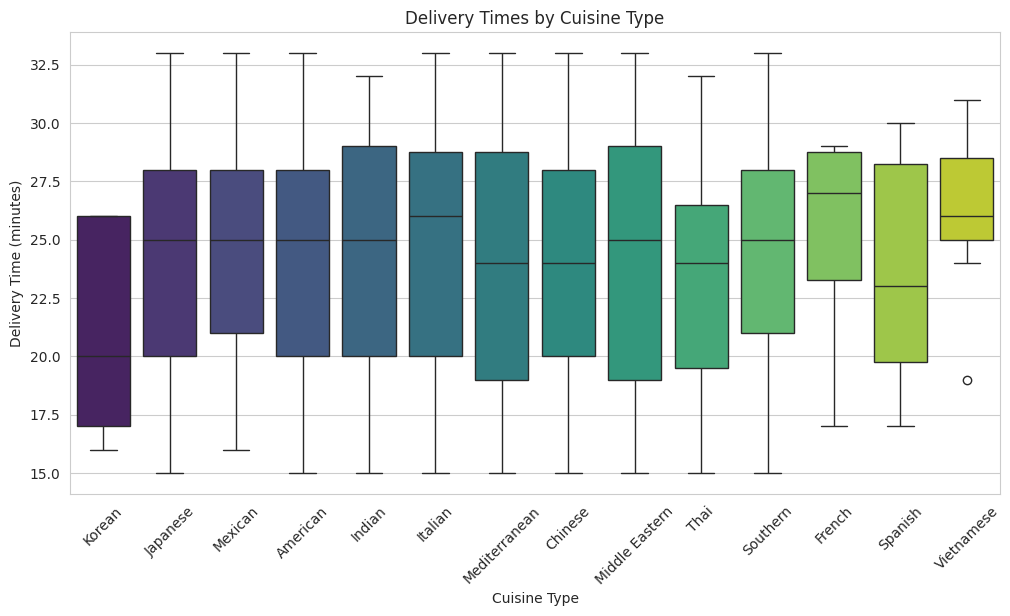

In [146]:
# 1. Bar Plot for Order Counts per Cuisine Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, palette='viridis')
plt.title('Order Counts per Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# 2. Box Plot for Delivery Times by Cuisine Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time', palette='viridis')
plt.title('Delivery Times by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()


### Conclusions

The delivery times do not affect in the amount of orders by cousine type, we can see that the french cousine has a faster delivery but the american cousine has the most orders that others.

Assuption: the customers prefer the american cousine, or there is more offer of the american cousine.

<ipython-input-145-d0ce05746156>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cuisine_type', y='rating', palette='viridis')


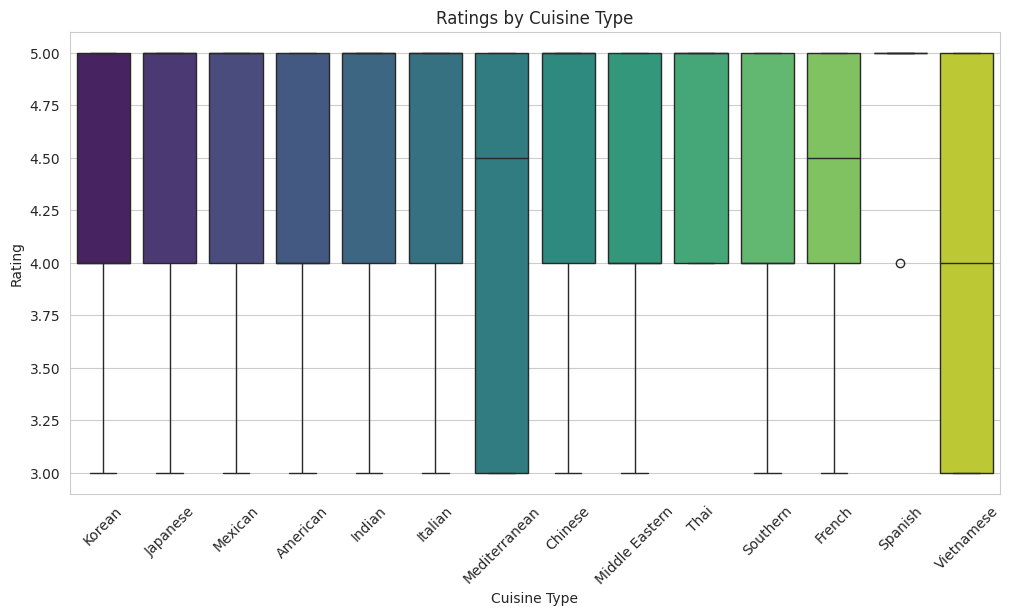

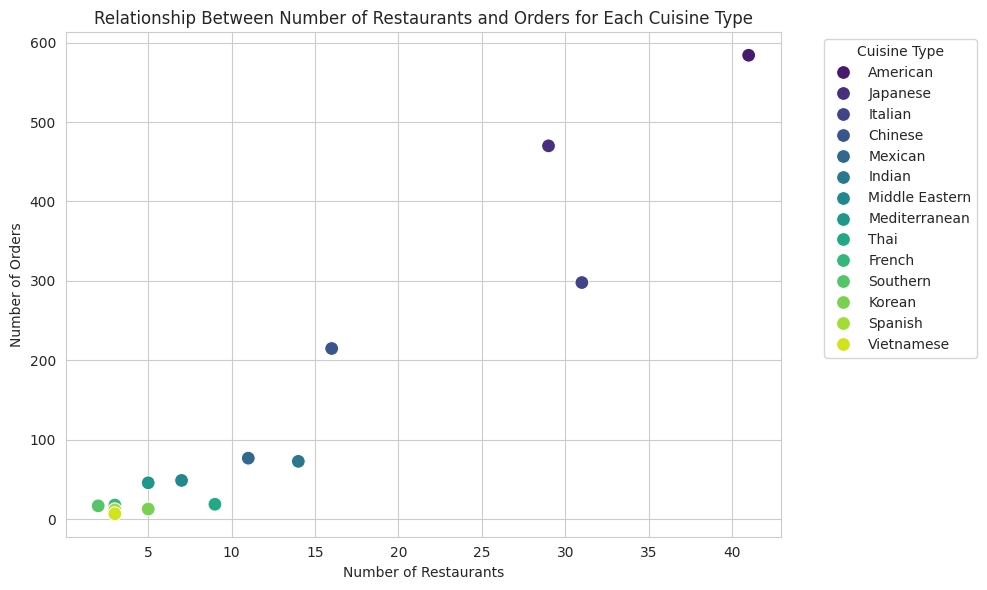

In [145]:

# 3. Box Plot for Ratings by Cuisine Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='rating', palette='viridis')
plt.title('Ratings by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate the x-labels for better readability
plt.show()

# 4. Cousine type vs amount of restaurants per type

cuisine_order_counts = df['cuisine_type'].value_counts().reset_index()
cuisine_order_counts.columns = ['cuisine_type', 'order_count']
restaurant_cuisine_counts = df.groupby('cuisine_type')['restaurant_name'].nunique().reset_index()
restaurant_cuisine_counts.columns = ['cuisine_type', 'restaurant_count']
cuisine_data = pd.merge(cuisine_order_counts, restaurant_cuisine_counts, on='cuisine_type')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cuisine_data, x='restaurant_count', y='order_count', hue='cuisine_type', palette='viridis', s=100)

plt.title('Relationship Between Number of Restaurants and Orders for Each Cuisine Type')
plt.xlabel('Number of Restaurants')
plt.ylabel('Number of Orders')
plt.legend(title='Cuisine Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### conclusions

As we can see here, in deed there is more offer of American Cousine, provoking more demand on orders with that type of cousine

Another interesting insight is most of the customers do not rate below 4.

With this information it is not clear if the customers prefer more the american cousine becuase their rating due to is very comparable with other cousines.

I conclude the american cousine receive more orders becuase there are more restaurants under that category.

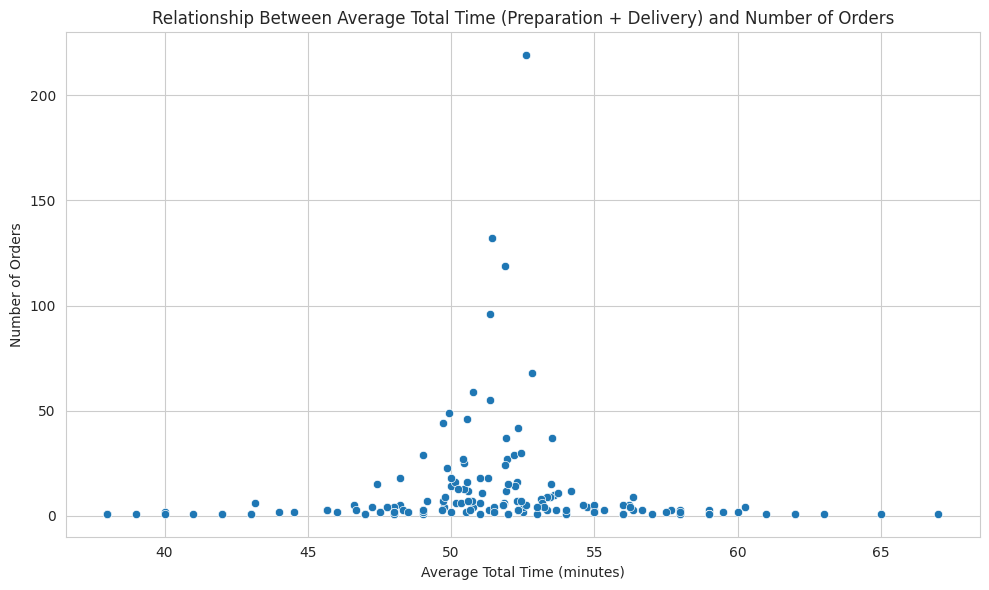

In [151]:

df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the average total time for each restaurant
average_times = df.groupby('restaurant_name')['total_time'].mean().reset_index()
average_times.columns = ['restaurant_name', 'average_total_time']
# Count the number of orders for each restaurant
order_counts = df['restaurant_name'].value_counts().reset_index()
order_counts.columns = ['restaurant_name', 'order_count']
# Merge the two DataFrames on restaurant_name
restaurant_data = pd.merge(average_times, order_counts, on='restaurant_name')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=restaurant_data, x='average_total_time', y='order_count')

# Add titles and labels
plt.title('Relationship Between Average Total Time (Preparation + Delivery) and Number of Orders')
plt.xlabel('Average Total Time (minutes)')
plt.ylabel('Number of Orders')

# Show the plot
plt.tight_layout()
plt.show()

### Conclusion

The total time of delivery seems to follow a normal distribution, if a restaurant delivers between 50 and 55 minutues, it has a normal delivery time.

<ipython-input-117-4fba346e6aa2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=cuisine_data, x='cuisine_type', y='average_total_time', palette='viridis')


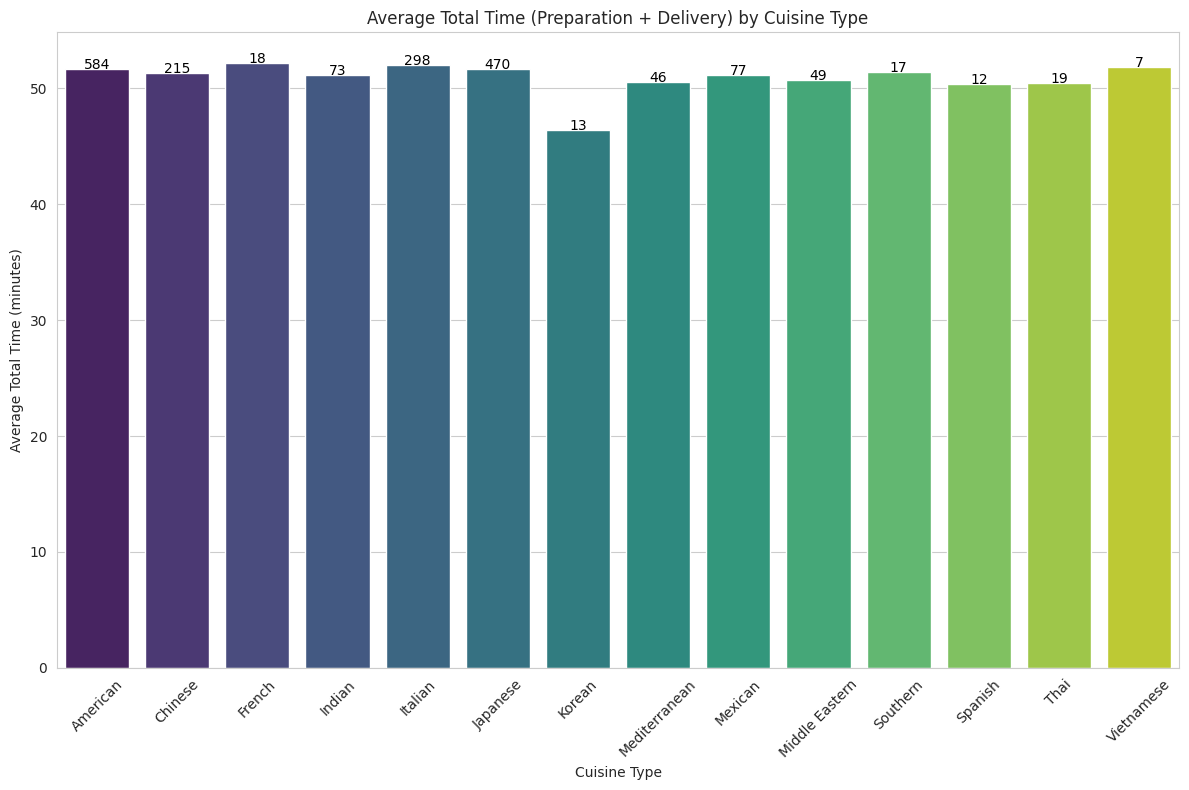

In [117]:
# Calculate the total time (preparation time + delivery time) for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the average total time for each type of cuisine
average_times = df.groupby('cuisine_type')['total_time'].mean().reset_index()
average_times.columns = ['cuisine_type', 'average_total_time']
# Count the number of orders for each type of cuisine
order_counts = df['cuisine_type'].value_counts().reset_index()
order_counts.columns = ['cuisine_type', 'order_count']
cuisine_data = pd.merge(average_times, order_counts, on='cuisine_type')
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=cuisine_data, x='cuisine_type', y='average_total_time', palette='viridis')

# Add the number of orders as labels on top of the bars
for index, row in cuisine_data.iterrows():
    barplot.text(row.name, row.average_total_time, round(row.order_count, 2), color='black', ha="center")

# Add titles and labels
plt.title('Average Total Time (Preparation + Delivery) by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Total Time (minutes)')
plt.xticks(rotation=45)  # Rotate the x-labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

### conclusions

The total delivery time (delivery time plus food preparation type) per cousine follows a similar amount between each other, we cannot conclude that it is a competitive advantage the amount of preparation per the type of cousine

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [126]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Converts 'Not Given' to NaN if it's a string
df_filtered = df.dropna(subset=['rating'])
restaurant_ratings = df_filtered.groupby('restaurant_name')['rating'].agg(['mean', 'count']).reset_index()
restaurant_ratings.columns = ['restaurant_name', 'average_rating', 'rating_count']


eligible_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)]

print(eligible_restaurants.sort_values(by='average_rating', ascending=False))




               restaurant_name  average_rating  rating_count
132          The Meatball Shop        4.511905            84
16   Blue Ribbon Fried Chicken        4.328125            64
117                Shake Shack        4.278195           133
17           Blue Ribbon Sushi        4.219178            73


#### Observations:

We found 5 restaurants that fullfill the criteria:
1. The Meatball shop
2. Blue Ribbon Fried Chicken
3. Shake Shack
4. Blue Ribbon Sushi


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [132]:
def calculate_revenue(order_cost):
    if order_cost > 20:
        return order_cost * 0.25
    elif order_cost > 5:
        return order_cost * 0.15
    else:
        return 0

def calculate_no_revenue(order_cost):
  if order_cost <= 5:
    return 1
  return np.nan

# get the revenue from each order
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

net_revenue = df['revenue'].sum()

df['no_cost']=df['cost_of_the_order'].apply(calculate_no_revenue)

no_revenue = df['no_cost'].count()


print(f"The net revenue generated by the company across all orders is: ${net_revenue:.2f}")
print(f"The amount of orders with no revenue is {no_revenue}")

The net revenue generated by the company across all orders is: $6166.30
The amount of orders with no revenue is 9


#### Observations:
The net revenue generated is $6166.30 dollars

Only 9 orders genered 0 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [134]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
orders_over_60 = (df['total_time'] > 60).sum()
total_orders = len(df)
percentage_over_60 = (orders_over_60 / total_orders) * 100

print(f"The percentage of orders that take more than 60 minutes to deliver is: {percentage_over_60:.2f}%")

The percentage of orders that take more than 60 minutes to deliver is: 10.54%


#### Observations:

only 10.54% of orders take more that 60 minutes, this could be because customers are not willing to wait for their food longer


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [139]:
delivery_stats = df.groupby('day_of_the_week').agg(
    mean_delivery_time=('delivery_time', 'mean'),
    order_count=('delivery_time', 'count')
).reset_index()
delivery_stats

,day_of_the_week,mean_delivery_time,order_count
0,Weekday,28.340037,547
1,Weekend,22.470022,1351


<ipython-input-140-fff4b965dec9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_the_week', palette='coolwarm')


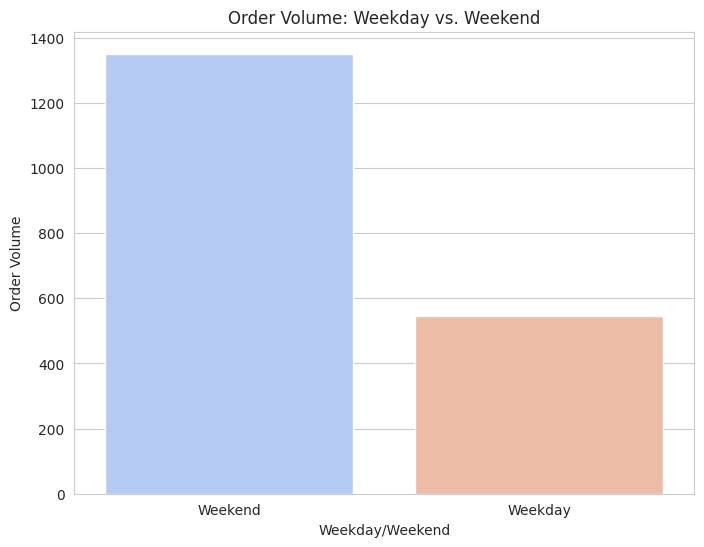

In [140]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='day_of_the_week', palette='coolwarm')
plt.title('Order Volume: Weekday vs. Weekend')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Order Volume')
plt.show()

<ipython-input-141-2df03aef68b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', palette='coolwarm')


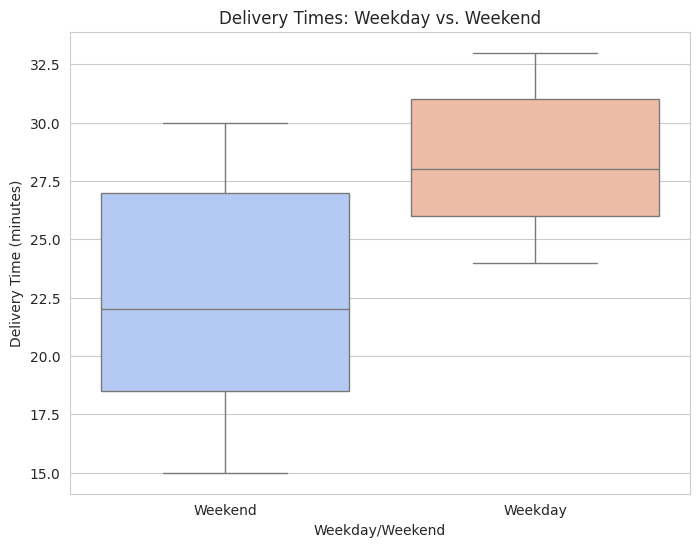

In [141]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', palette='coolwarm')
plt.title('Delivery Times: Weekday vs. Weekend')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Delivery Time (minutes)')
plt.show()

<ipython-input-143-1983ed2086ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time', palette='coolwarm')


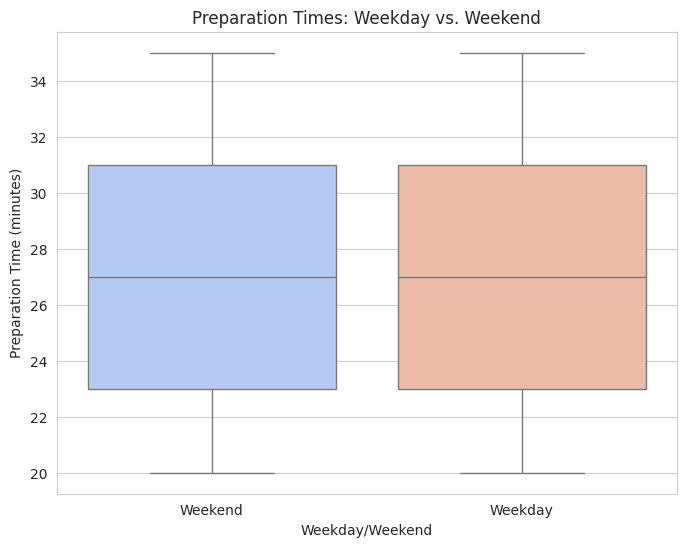

In [143]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time', palette='coolwarm')
plt.title('Preparation Times: Weekday vs. Weekend')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Preparation Time (minutes)')
plt.show()


<ipython-input-144-674cd72e2f5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_the_week', y='rating', palette='coolwarm')


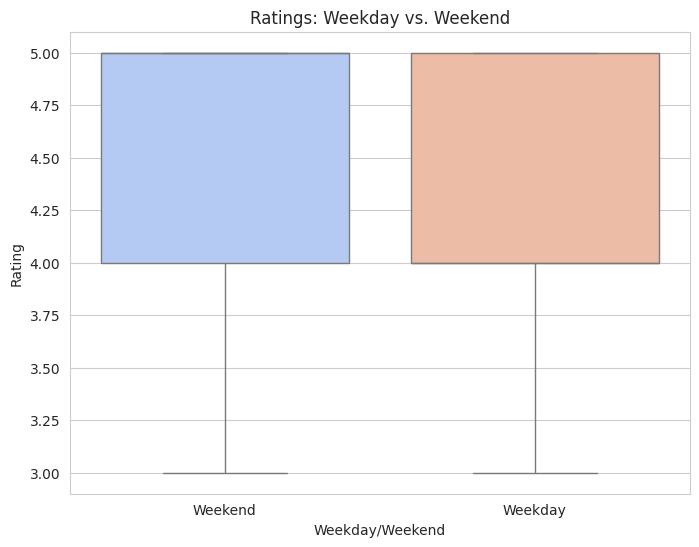

In [144]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day_of_the_week', y='rating', palette='coolwarm')
plt.title('Ratings: Weekday vs. Weekend')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Rating')
plt.show()

#### Observations:
The delivery time during weekends is less than on weekdays. Although there is more demand during weekends, the delivery time is less; some possible assumptions for that behavior could be:

- Less traffic
- more couriers available


Mean of delivery times

Weekday = 28.340037	547
Weekend	= 22.470022	1351


The food preparation time and the rating is not impacted if it is weekday or weekend

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* There is more activity during weekends rather than weekdays
* The type of cousine does not impact on delivery types
* The amount of others of a specific cousine type does not depends on preference (ratings) it depends of the amount of restaurants of that cousine type
* with the current rating system, it is hard to get clear preference information about food from the customer
* No customer is rating below 3
* there is not distinction about rating: the customer is not rating the food quality, nor the food delivery nor the food preparation time, she is giving a global rating, perhaps that's why is difficult to get honest rating data there
* Customers pefer to oder during weekends

day_of_the_week
Weekday    17.365269
Weekend    82.634731
Name: order_count, dtype: float64


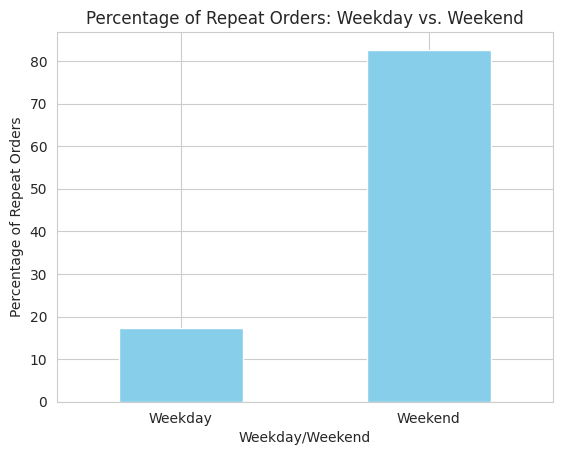

In [149]:
## Repetaed orders behavior
order_counts = df.groupby(['day_of_the_week', 'customer_id']).size().reset_index(name='order_count')
repeat_customers = order_counts[order_counts['order_count'] > 1]
repeat_order_counts = repeat_customers.groupby('day_of_the_week')['order_count'].sum()
total_repeat_orders = repeat_order_counts.sum()
repeat_order_percentage = (repeat_order_counts / total_repeat_orders) * 100
print(repeat_order_percentage)
repeat_order_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Repeat Orders: Weekday vs. Weekend')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Percentage of Repeat Orders')
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.show()


### Recommendations:

*  Splitting the rating system into separate parts for food quality, delivery time, and prep time could give us clearer feedback. It's a straightforward way to see what's working well and what's not, helping restaurants fix issues and up their game.

* The more restaurants there are for a specific type of cuisine, the more likely it is to get orders for that cuisine. Basically, more options mean more orders for that kind of food.

* Evaluating the cost per dish for each cuisine type could be a strategic move, particularly in promoting restaurants specializing in certain cuisines. This approach could prove mutually beneficial. If it's found that specific cuisine types are represented by a greater number of restaurants and these establishments offer dishes at lower costs, this could stimulate demand. The principle here is that the variety and affordability of cuisine options tend to drive customer demand. Therefore, emphasizing cost-effective cuisine types in promotions could align well with market dynamics, potentially boosting profitability for the involved restaurants as well as the company.

* Aiming for delivery times under 30 minutes could be a solid goal for boosting business.

---